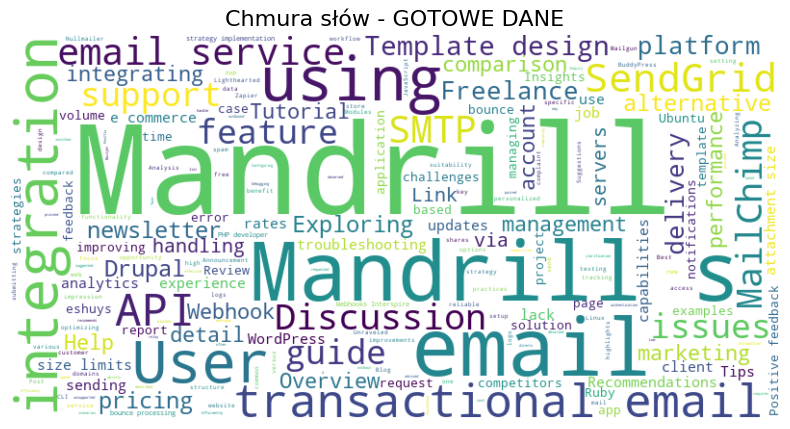

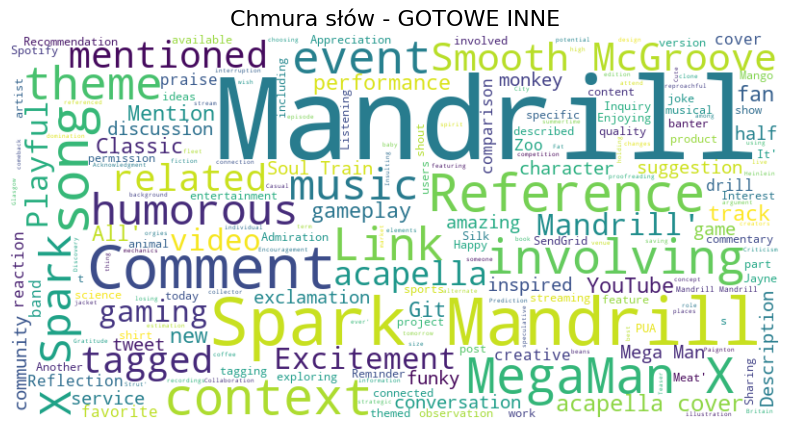

In [129]:
import pandas as pd
# openpyxl
import openpyxl
# Załaduj dane z pliku Excel
mandrill_data = pd.read_excel("Dane_3_2_Mandrill.xlsx", sheet_name="GOTOWE DANE")
other_data = pd.read_excel("Dane_3_2_Mandrill.xlsx", sheet_name="GOTOWE INNE")

# Oznacz dane etykietami
mandrill_data['label'] = 'Mandrill'
other_data['label'] = 'inne'

# Połącz dane w jeden zbiór
data = pd.concat([mandrill_data, other_data], ignore_index=True)
data = data[['Post', 'label']]  # Upewnij się, że dane mają kolumny 'Post' i 'label'

data
from sklearn.model_selection import train_test_split

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    data['Post'], data['label'], test_size=0.2, random_state=42
)

from sklearn.feature_extraction.text import TfidfVectorizer

# Przekształć dane tekstowe na wektory numeryczne
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Chmura słów
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Chmura słów dla "GOTOWE DANE"
wordcloud_dane = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(' '.join(mandrill_data['Post']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dane, interpolation='bilinear')
plt.axis('off')
plt.title("Chmura słów - GOTOWE DANE", fontsize=16)
plt.show()

# Chmura słów dla "GOTOWE INNE"
wordcloud_inne = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(' '.join(other_data['Post']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inne, interpolation='bilinear')
plt.axis('off')
plt.title("Chmura słów - GOTOWE INNE", fontsize=16)
plt.show()


In [130]:
from sklearn.model_selection import train_test_split

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    data['Post'], data['label'], test_size=0.2, random_state=42
)


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Przekształć dane tekstowe na wektory numeryczne
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Define the coordinates and values
coords_values = [
    (0, 391, 0.0722880688977364),
    (0, 482, 0.3353665249996686),
    (0, 362, 0.31482676013114486),
    (0, 724, 0.3848554625154668),
    (0, 113, 0.34838381827448234),
    (0, 80, 0.4138046351627412),
    (0, 615, 0.4138046351627412),
    (0, 753, 0.4138046351627412)
]

example_index = 132
example_post = X_train.iloc[example_index]
example_tfidf_values = X_train_tfidf[example_index]

# Print the word, coordinates, and values
for coord in coords_values:
    word = feature_names[coord[1]]
    print(f"Word: {word}, Coords: {coord[:2]}, Value: {coord[2]}")

Word: mandrill, Coords: (0, 391), Value: 0.0722880688977364
Word: platforms, Coords: (0, 482), Value: 0.3353665249996686
Word: like, Coords: (0, 362), Value: 0.31482676013114486
Word: use, Coords: (0, 724), Value: 0.3848554625154668
Word: commerce, Coords: (0, 113), Value: 0.34838381827448234
Word: cases, Coords: (0, 80), Value: 0.4138046351627412
Word: shopify, Coords: (0, 615), Value: 0.4138046351627412
Word: woocommerce, Coords: (0, 753), Value: 0.4138046351627412


In [132]:
from sklearn.naive_bayes import MultinomialNB

# Trening modelu
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [133]:
from sklearn.metrics import classification_report, accuracy_score

# Przewidywanie klas na zbiorze testowym
y_pred = classifier.predict(X_test_tfidf)

# Wyświetl raport klasyfikacji
print(classification_report(y_test, y_pred))
print(f"Dokładność: {accuracy_score(y_test, y_pred):.2f}")


              precision    recall  f1-score   support

    Mandrill       0.94      0.94      0.94        31
        inne       0.93      0.93      0.93        30

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61

Dokładność: 0.93


179        inne
228        inne
111    Mandrill
246        inne
60     Mandrill
         ...   
249        inne
104    Mandrill
299        inne
193        inne
184        inne
Name: label, Length: 61, dtype: object
AUC po weryfikacji: 0.9817204301075269


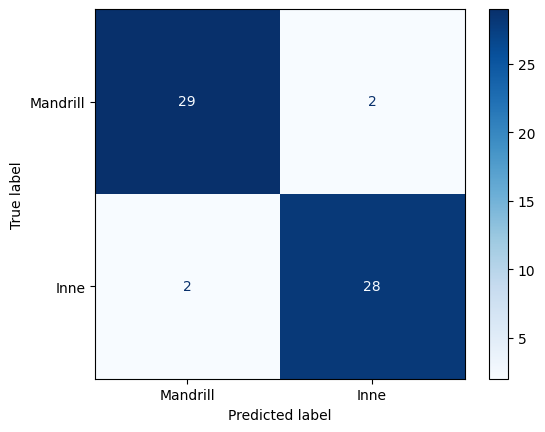

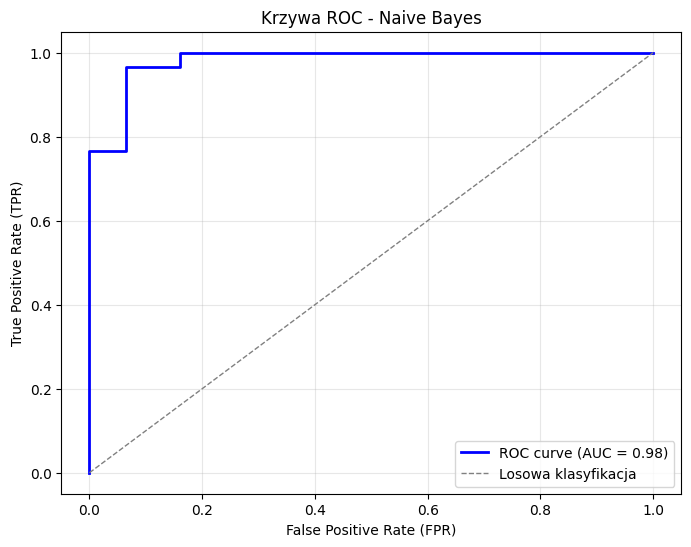

ROC  0.9817204301075269


In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, accuracy_score

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Mandrill", "Inne"])
disp.plot(cmap="Blues")
# krzywa ROC
print(y_test)

from sklearn.preprocessing import LabelBinarizer

# Przekształcenie etykiet na wartości binarne
binarizer = LabelBinarizer()
y_test_binary = binarizer.fit_transform(y_test).ravel()  # Konwersja y_test na binarne
y_pred_prob = classifier.predict_proba(X_test_tfidf)[:, 1]  # Prawdopodobieństwa klasy pozytywnej

# Obliczenie metryk ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Wyświetlenie wyników
print("AUC po weryfikacji:", roc_auc)

# Wizualizacja krzywej ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Losowa klasyfikacja')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print("ROC  " + str(roc_auc))

In [135]:
new_posts = [
    "The Mandrill API is great for sending personalized emails!",
    "I saw a Mandrill at the zoo today, it was fascinating!"
]

new_posts_tfidf = vectorizer.transform(new_posts)
predictions = classifier.predict(new_posts_tfidf)

for post, prediction in zip(new_posts, predictions):
    print(f"Post: {post} => Klasyfikacja: {prediction}")


Post: The Mandrill API is great for sending personalized emails! => Klasyfikacja: Mandrill
Post: I saw a Mandrill at the zoo today, it was fascinating! => Klasyfikacja: inne


In [136]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
# Tworzenie i trening modelu regresji logistycznej
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_tfidf, y_train)




LogisticRegression(max_iter=1000, random_state=42)

In [137]:
from sklearn.metrics import roc_curve, auc, accuracy_score

# Przewidywanie klas za pomocą regresji logistycznej
y_pred_logistic = logistic_model.predict(X_test_tfidf)

# Wyświetlenie raportu klasyfikacji
print("=== Regresja Logistyczna ===")
print(classification_report(y_test, y_pred_logistic))
print(f"Dokładność: {accuracy_score(y_test, y_pred_logistic):.2f}")

# krzywa ROC


=== Regresja Logistyczna ===
              precision    recall  f1-score   support

    Mandrill       0.97      0.90      0.93        31
        inne       0.91      0.97      0.94        30

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61

Dokładność: 0.93


In [138]:
print("=== Porównanie ===")
print("Naive Bayes:")
print(f"Dokładność: {accuracy_score(y_test, y_pred):.2f}")
print("\nRegresja Logistyczna:")
print(f"Dokładność: {accuracy_score(y_test, y_pred_logistic):.2f}")


=== Porównanie ===
Naive Bayes:
Dokładność: 0.93

Regresja Logistyczna:
Dokładność: 0.93


In [139]:
# Przewidywanie nowych postów
logistic_predictions = logistic_model.predict(new_posts_tfidf)

for post, prediction in zip(new_posts, logistic_predictions):
    print(f"Post: {post} => Klasyfikacja (Regresja Logistyczna): {prediction}")


Post: The Mandrill API is great for sending personalized emails! => Klasyfikacja (Regresja Logistyczna): Mandrill
Post: I saw a Mandrill at the zoo today, it was fascinating! => Klasyfikacja (Regresja Logistyczna): inne


179        inne
228        inne
111    Mandrill
246        inne
60     Mandrill
         ...   
249        inne
104    Mandrill
299        inne
193        inne
184        inne
Name: label, Length: 61, dtype: object


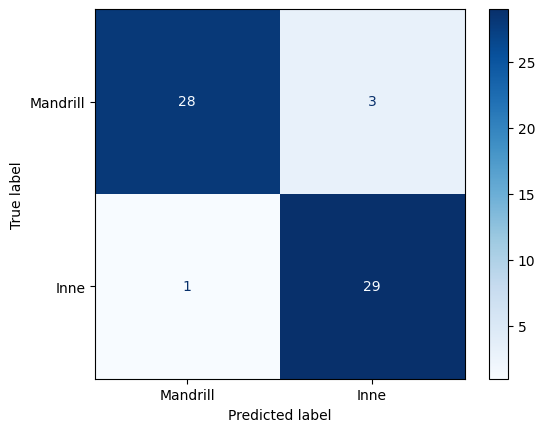

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Mandrill", "Inne"])
disp.plot(cmap="Blues")
# krzywa ROC
print(y_test)


AUC po weryfikacji: 0.9774193548387096


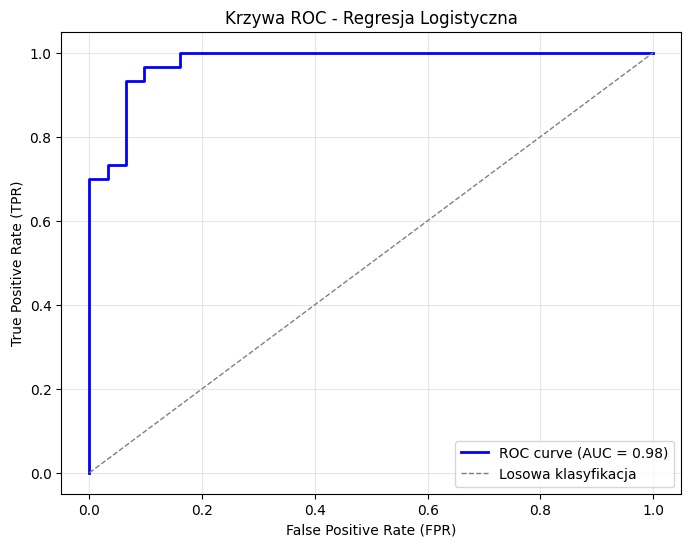

In [141]:
from sklearn.preprocessing import LabelBinarizer

# Przekształcenie etykiet na wartości binarne
binarizer = LabelBinarizer()
y_test_binary = binarizer.fit_transform(y_test).ravel()  # Konwersja y_test na binarne
y_pred_prob_logistic = logistic_model.predict_proba(X_test_tfidf)[:, 1]  # Prawdopodobieństwa klasy pozytywnej

# Obliczenie metryk ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob_logistic)
roc_auc = auc(fpr, tpr)

# Wyświetlenie wyników
print("AUC po weryfikacji:", roc_auc)

# Wizualizacja krzywej ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Losowa klasyfikacja')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC - Regresja Logistyczna')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [142]:
# wyswietls słowa najbardziej zwiazane z mandrill
# Pobierz współczynniki modelu regresji logistycznej
# Pobierz współczynniki modelu regresji logistycznej

logistic_coefs = logistic_model.coef_[0]

# Posortuj współczynniki i pobierz indeksy
sorted_indices = logistic_coefs.argsort()

# Pobierz 10 słów najbardziej związanych z klasą 'Mandrill'
top_n = 10
top_positive_words = [feature_names[i] for i in sorted_indices[-top_n:]]
top_negative_words = [feature_names[i] for i in sorted_indices[:top_n]]

print("Słowa najbardziej związane z klasą 'Mandrill':")
for word in top_positive_words:
    print(word)

print("\nSłowa najbardziej związane z klasą 'inne':")
for word in top_negative_words:
    print(word)

# posty źle sklasyfikowane
# Pobierz indeksy postów źle sklasyfikowanych
misclassified_indices = y_test[y_test != y_pred_logistic].index

# Pobierz posty źle sklasyfikowane
misclassified_posts = X_test.loc[misclassified_indices]

# Wyświetl posty
for post in misclassified_posts:
    print(post)

# Apply Laplace smoothing to the logistic regression coefficients
# Assuming 'feature_names' and 'logistic_coefs' are already defined
laplace_smoothed_coefs = logistic_coefs + 1  # Add 1 to each coefficient for smoothing

# Sort the Laplace-smoothed coefficients
smoothed_sorted_indices = laplace_smoothed_coefs.argsort()

# Extract top words based on Laplace-smoothed coefficients
top_smoothed_positive_words = [feature_names[i] for i in smoothed_sorted_indices[-top_n:]]
top_smoothed_negative_words = [feature_names[i] for i in smoothed_sorted_indices[:top_n]]

print("\nSłowa najbardziej związane z klasą 'Mandrill' (Laplace smoothing):")
for word in top_smoothed_positive_words:
    print(word)

print("\nSłowa najbardziej związane z klasą 'inne' (Laplace smoothing):")
for word in top_smoothed_negative_words:
    print(word)


# Calculate and display keyword frequencies in the dataset
from collections import Counter

# Assuming X_test is a Pandas DataFrame containing the text data
all_keywords = ' '.join(X_test.values.flatten()).split()
filtered
keyword_frequencies = Counter(all_keywords)

print("\nCzęstotliwości wystąpień słów kluczowych:")
for keyword, frequency in keyword_frequencies.most_common(20):  # Display top 20 keywords
    print(f"{keyword}: {frequency}")


Słowa najbardziej związane z klasą 'Mandrill':
humorous
megaman
related
music
context
spark
involving
reference
song
comment

Słowa najbardziej związane z klasą 'inne':
email
integration
api
using
template
user
transactional
pricing
emails
smtp
Considering the feasibility of Mandrill for specific use cases.
Discussion on Mandrill's comeback and performance.
Reference to Mandrill in a lighthearted jungle analogy.
JavaScript arrays as a solution in a Mandrill-related problem.

Słowa najbardziej związane z klasą 'Mandrill' (Laplace smoothing):
humorous
megaman
related
music
context
spark
involving
reference
song
comment

Słowa najbardziej związane z klasą 'inne' (Laplace smoothing):
email
integration
api
using
template
user
transactional
pricing
emails
smtp


NameError: name 'filtered' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Definicja CountVectorizer z usunięciem stopwords (dla polskich tekstów: stop_words='polish')
vectorizer = CountVectorizer(stop_words='english')  # Dla polskiego: stop_words='polish'

# Dopasowanie i transformacja danych tekstowych
word_count_matrix = vectorizer.fit_transform(mandrill_data['Post'].values.flatten())

# Pobranie nazw cech (słów kluczowych)
feature_names = vectorizer.get_feature_names_out()

# Obliczenie sumarycznych liczników wystąpień dla każdego słowa
word_counts = word_count_matrix.sum(axis=0).A1  # Suma po wszystkich dokumentach

# Utworzenie słownika {słowo: liczba_wystąpień}
word_frequencies = dict(zip(feature_names, word_counts))

# Posortowanie słów według liczby wystąpień
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Wyświetlenie 20 najczęstszych słów kluczowych
print("\nNajczęściej występujące słowa kluczowe (bez stopwords):")
for word, count in sorted_word_frequencies[:20]:
    print(f"{word}: {count}")


mandrill_data['label'] = 'Mandrill'
other_data['label'] = 'inne'


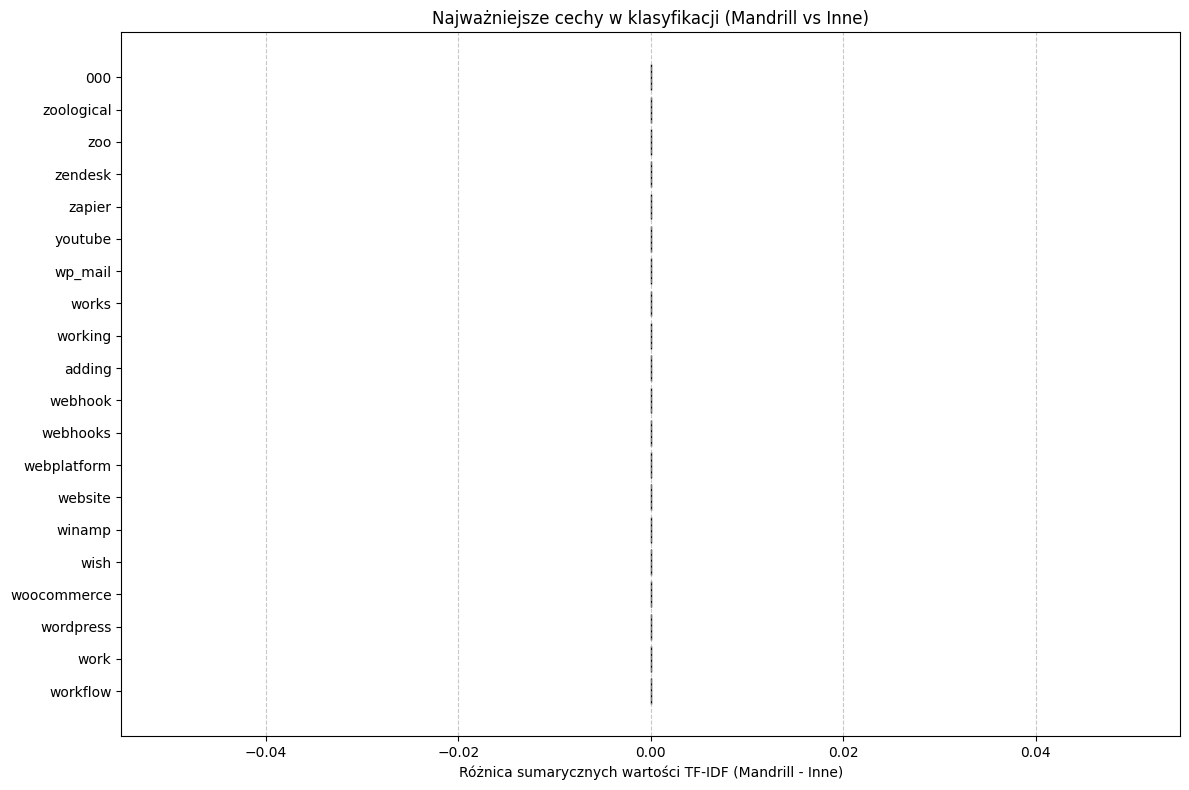

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Funkcja do obliczenia sumarycznych wartości TF-IDF dla cech
def calculate_tfidf_scores(data, labels, column_name, stop_words='english', top_n=10):
    """
    Oblicza sumaryczne wartości TF-IDF dla każdej cechy.

    Parametry:
        data (DataFrame): Dane wejściowe (np. DataFrame z kolumną tekstową).
        labels (ndarray): Klasy dla każdego wpisu w zbiorze danych.
        column_name (str): Nazwa kolumny z tekstem.
        stop_words (str): Język stopwords (np. 'english' lub 'polish').
        top_n (int): Liczba najistotniejszych cech do wyświetlenia.

    Zwraca:
        List[str], List[float]: Lista cech i ich sumarycznych wartości TF-IDF.
    """
    # Tworzenie TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    tfidf_matrix = vectorizer.fit_transform(data[column_name].values.flatten())
    feature_names = vectorizer.get_feature_names_out()

    # Rozdzielenie macierzy TF-IDF na klasy
    class_0_tfidf = tfidf_matrix[labels == 0].sum(axis=0).A1
    class_1_tfidf = tfidf_matrix[labels == 1].sum(axis=0).A1

    # Różnica wartości TF-IDF między klasą 1 (Mandrill) a klasą 0 (Inne)
    tfidf_diff = class_1_tfidf - class_0_tfidf

    # Sortowanie cech według różnicy wartości TF-IDF
    sorted_indices = np.argsort(tfidf_diff)
    sorted_features = [feature_names[i] for i in sorted_indices]
    sorted_tfidf_diff = tfidf_diff[sorted_indices]

    # Wybór najistotniejszych cech
    top_positive_features = sorted_features[-top_n:]
    top_positive_tfidf_diff = sorted_tfidf_diff[-top_n:]
    top_negative_features = sorted_features[:top_n]
    top_negative_tfidf_diff = sorted_tfidf_diff[:top_n]

    # Łączenie wyników
    all_features = top_negative_features + top_positive_features
    all_tfidf_diff = np.hstack([top_negative_tfidf_diff, top_positive_tfidf_diff])

    return all_features, all_tfidf_diff

# Dane wejściowe (przykładowo)
# Zakładam, że dane i etykiety są w formacie:
# `data['Post']` (teksty) i `data['Label']` (klasy: 0 = Inne, 1 = Mandrill)
# data = ...

# Obliczanie różnic wartości TF-IDF
features, tfidf_diff = calculate_tfidf_scores(
    data, labels=data['label'].values, column_name='Post', stop_words='english', top_n=10
)

# Przypisywanie kolorów (czerwony dla cech związanych z 'Inne', niebieski dla 'Mandrill')
colors = ['red'] * 10 + ['blue'] * 10

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
plt.barh(features, tfidf_diff, color=colors, edgecolor="black")
plt.xlabel("Różnica sumarycznych wartości TF-IDF (Mandrill - Inne)")
plt.title("Najważniejsze cechy w klasyfikacji (Mandrill vs Inne)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


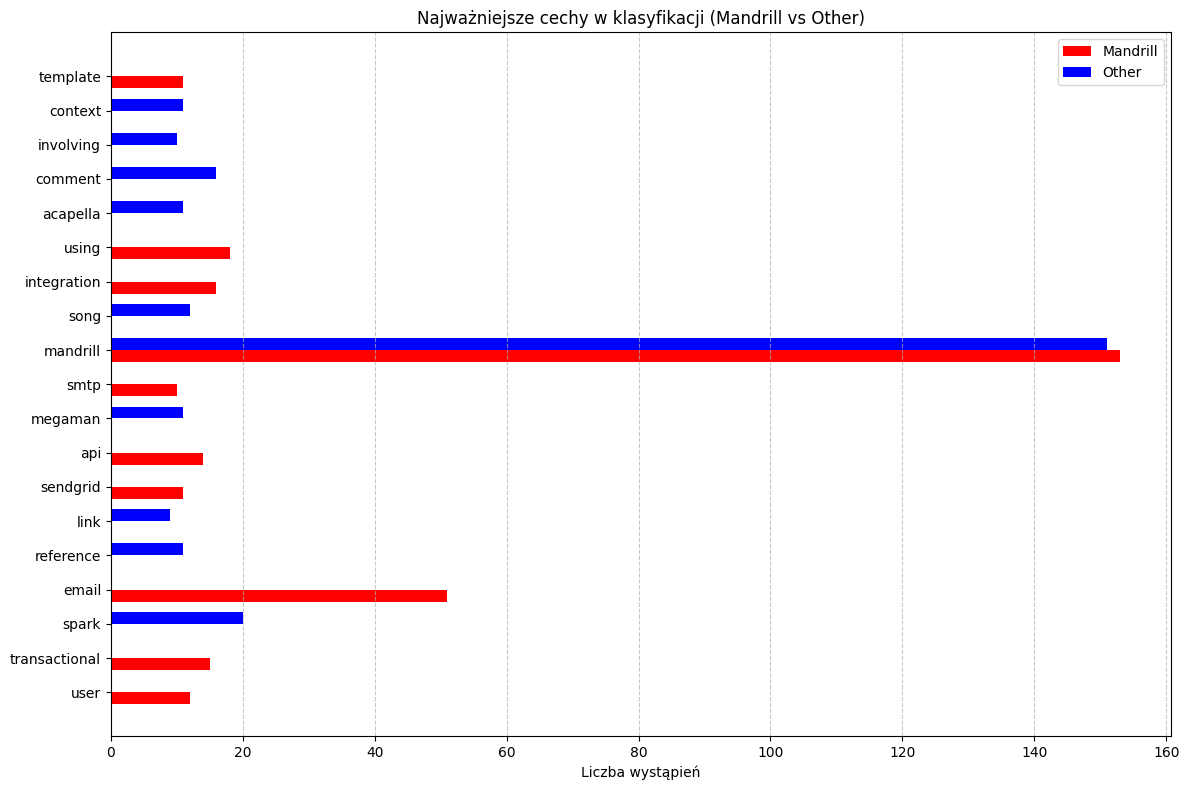

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Funkcja do obliczenia sumarycznej liczby wystąpień dla cech
def calculate_word_counts(data, column_name, stop_words='english', top_n=10):
    """
    Oblicza sumaryczną liczbę wystąpień słów w całym zbiorze danych.

    Parametry:
        data (DataFrame): Dane wejściowe (np. DataFrame z kolumną tekstową).
        column_name (str): Nazwa kolumny z tekstem.
        stop_words (str): Język stopwords (np. 'english' lub 'polish').
        top_n (int): Liczba najistotniejszych cech do wyświetlenia.

    Zwraca:
        List[str], List[int]: Lista cech i ich liczników wystąpień.
    """
    # Tworzenie CountVectorizer
    vectorizer = CountVectorizer(stop_words=stop_words)
    word_count_matrix = vectorizer.fit_transform(data[column_name].values.flatten())
    feature_names = vectorizer.get_feature_names_out()

    # Suma liczników wystąpień dla każdego słowa w całym zbiorze
    word_counts = word_count_matrix.sum(axis=0).A1

    # Sortowanie cech według liczby wystąpień
    sorted_indices = np.argsort(word_counts)
    sorted_features = [feature_names[i] for i in sorted_indices]
    sorted_word_counts = word_counts[sorted_indices]

    # Wybór najczęstszych cech
    top_positive_features = sorted_features[-top_n:]
    top_positive_counts = sorted_word_counts[-top_n:]

    return top_positive_features, top_positive_counts

# Obliczanie sumarycznej liczby wystąpień dla obu zbiorów
features_mandrill, word_counts_mandrill = calculate_word_counts(
    mandrill_data, column_name='Post', stop_words='english', top_n=10
)

features_other, word_counts_other = calculate_word_counts(
    other_data, column_name='Post', stop_words='english', top_n=10
)

# Łączenie danych w jeden zbiór
all_features = list(set(features_mandrill + features_other))  # Unikalne cechy
mandrill_counts = [word_counts_mandrill[features_mandrill.index(f)] if f in features_mandrill else 0 for f in all_features]
other_counts = [word_counts_other[features_other.index(f)] if f in features_other else 0 for f in all_features]

# Tworzenie wykresu
bar_width = 0.35  # Szerokość słupków
indices = np.arange(len(all_features))

plt.figure(figsize=(12, 8))

# Słupki dla `mandrill_data`
plt.barh(indices - bar_width / 2, mandrill_counts, bar_width, color='red', label='Mandrill')

# Słupki dla `other_data`
plt.barh(indices + bar_width / 2, other_counts, bar_width, color='blue', label='Other')

# Dodanie etykiet i tytułu
plt.yticks(indices, all_features)
plt.xlabel("Liczba wystąpień")
plt.title("Najważniejsze cechy w klasyfikacji (Mandrill vs Other)")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
